In [ ]:
from datasets import load_dataset
import pandas as pd

# Load the dataset from huggingface
dataset = load_dataset("dair-ai/emotion")

# Convert to pandas DataFrame
train_df = dataset['train'].to_pandas()
test_df = dataset['test'].to_pandas()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Display sample
print(train_df.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [ ]:
# Vectorize text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

In [ ]:
# Encode labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(train_df['label'])
y_test = le.transform(test_df['label'])

In [ ]:
# Train model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Accuracy
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.869


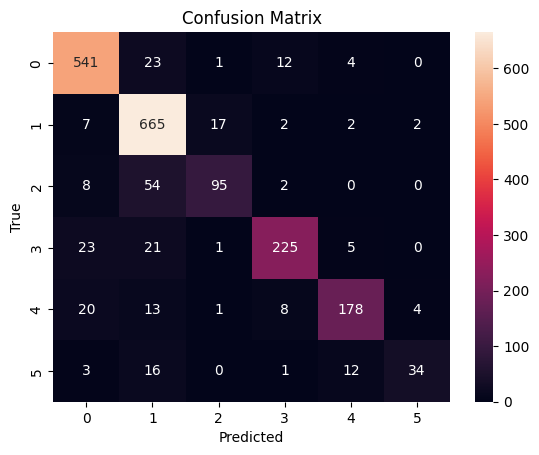

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Detailed report
target_names_str = [str(cls) for cls in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names_str))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       581
           1       0.84      0.96      0.89       695
           2       0.83      0.60      0.69       159
           3       0.90      0.82      0.86       275
           4       0.89      0.79      0.84       224
           5       0.85      0.52      0.64        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



In [ ]:
# Custom prediction example
sample_text = "I have a headache"

# Vectorize the input text
sample_vector = vectorizer.transform([sample_text])

# Predict the label
predicted_label = model.predict(sample_vector)

# Convert numeric label to emotion
predicted_emotion = le.inverse_transform(predicted_label)[0]

print(f"Input: {sample_text}")
print(predicted_emotion)

if (predicted_emotion == 0):
    print("Predicted Emotion: sadness")
elif (predicted_emotion == 1):
    print("Predicted Emotion: joy")
elif (predicted_emotion == 2):
    print("Predicted Emotion: love")
elif (predicted_emotion == 3):
    print("Predicted Emotion: anger")
elif (predicted_emotion == 4):
    print("Predicted Emotion: fear")
elif (predicted_emotion == 5):
    print("Predicted Emotion: surprise")

Input: I have a headache
0
Predicted Emotion: sadness


In [ ]:
import pickle

In [ ]:
with open("emotion_class_model.sav", "wb") as f:
    pickle.dump((vectorizer, model), f)